In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [8]:
import plotly.express as px

In [9]:
# conda install seaborn

In [10]:
sns.set_style("darkgrid")

In [11]:
# Importing all required libraries
import warnings
warnings.filterwarnings("ignore")

# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [12]:
# Importing Dataset to the enviorment
sm = pd.read_csv("/Users/christopherdevlin/Downloads/supermarket_sales - Sheet1.csv")

In [13]:
# Exploring Dataset before proceeding with analysis
sm

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [14]:
# Exploring dataset by describing it to see statisctical values of quantitative variables in dataset
sm.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [15]:
# Extracting Year, Month and Day from dataset and creating new columns to perform time series analysis
# Here first i converted the column Date is in object formate. I converted it into Date Time formate

sm.info()
sm["Date"] = pd.to_datetime(sm["Date"])
sm.Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [16]:
# Year
sm["Date"].dt.year

# Month
sm["Date"].dt.month

# Day
sm["Date"].dt.day

0       5
1       8
2       3
3      27
4       8
       ..
995    29
996     2
997     9
998    22
999    18
Name: Date, Length: 1000, dtype: int64

In [17]:
# Creating Year, Month and Day Columns

sm["Year"] = sm["Date"].dt.year
sm["Month"] = sm["Date"].dt.month
sm["Day"] = sm["Date"].dt.day

# Checking dataset by prinitng it to see the changes
sm

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019,1,29
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019,3,2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,2019,2,9
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,2019,2,22


In [18]:
# Now assigning names to our newly created month column

month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
sm['Month'] = sm['Month'].map(month_names)

# Checking dataset by prinitng it to see the changes
sm

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,January,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,March,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,March,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,January,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,February,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019,January,29
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019,March,2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,2019,February,9
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,2019,February,22


In [19]:
# Creating Year, Month and Day Columns in the dataset

# Assuming 'sm' is your DataFrame
# Adding year column
sm["Year"] = sm["Date"].dt.year
# Assuming 'sm' is your DataFrame
# Adding Month column 
sm["Month"] = sm["Date"].dt.month
# Assuming 'sm' is your DataFrame
# Adding Day column 
sm["Day"] = sm["Date"].dt.day

#Printing the dataset to check the new columns
sm

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019,1,29
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019,3,2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,2019,2,9
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,2019,2,22


# Here are the Conclusions of our Analysis

#1) The highest number of branches are in branch 'A'.

#2) Though 'A' has the highest number of branches, Branch 'C' contributing more revenue through sales.

#3) The highest earning productline in business is 'Food and Beverages', It is contributing 17.4% of sales.

#4) Through time series analysis we found that the highest amount of sales hit in January and lowest is February.

#5) Through comparison of sales vs tax, We found that branch 'C' is paying highest taxes because of it's high volume of sales.

#6) The average rating of the all sales is 6.5 / 10.

#7) Through heat map, We found that the highest sale recorded in 11nth of February.

#8) Productline Health and Beauty earned highest gross income among all.

#9) Most used payment method is E-Wallet.

#10) Product line electronic accessories have purchased the highest quantity.

#11) The purchases of Males are higher then females.

#12) Health and Beauty is the only product line where female purchases are higher then males.

#13) Branch 'A' has highest male purchases and banch 'B' has highest female purchases

#14) Food and beverages has spending high amount for selling goods, It has highest cogs amount.

#15) Females are earning more then males. Females has higher income.

#16) Members are the highest customer segment in branch 'C' and normal customers are highest segment in branch 'A'.

# Total Number of Branches

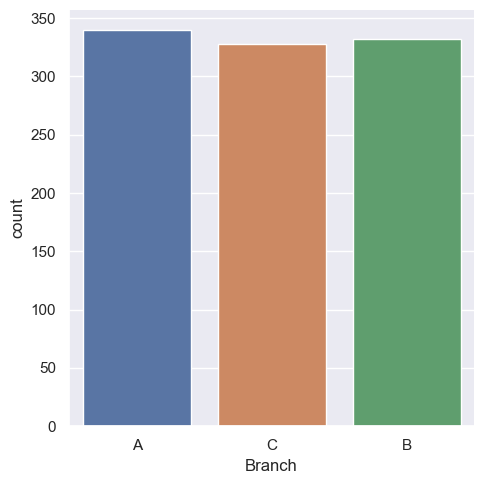

In [46]:
# Creating barplot of count of branches
sns.catplot(data=sm, x="Branch", kind="count")


# Bar Chart: Sales distribution by branch or city

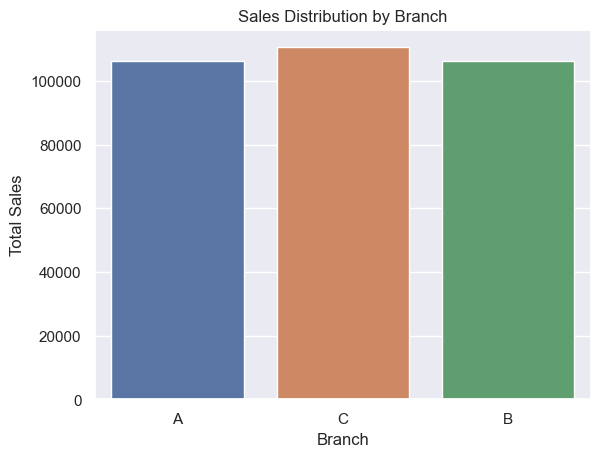

In [24]:
# Bar chart - Sales distribution by branch
# Creating barplot of distrinbution of branches 
plt.figure
sns.barplot(x='Branch', y='Total', data=sm, estimator=sum, ci=None)
plt.title('Sales Distribution by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')

# Showing the plot
plt.show()

# Pie chart - Percentage of sales by product line

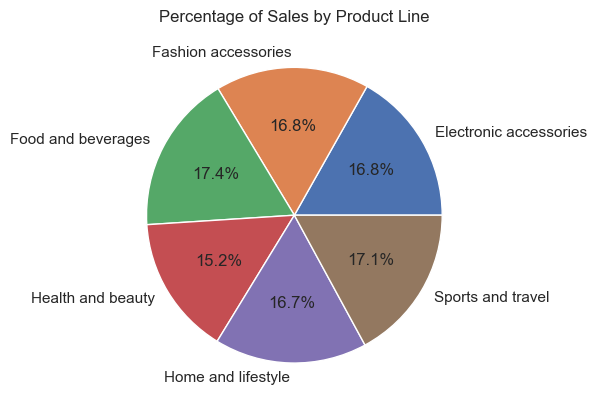

In [25]:
# Creating pie-chart of percentage of sales by product line
plt.figure
sales_productline = sm.groupby('Product line')['Total'].sum()
plt.pie(sales_productline, labels=sales_productline.index, autopct='%1.1f%%')
plt.title('Percentage of Sales by Product Line')

# Showing the plot
plt.show()

# Line chart - Sales trend over time

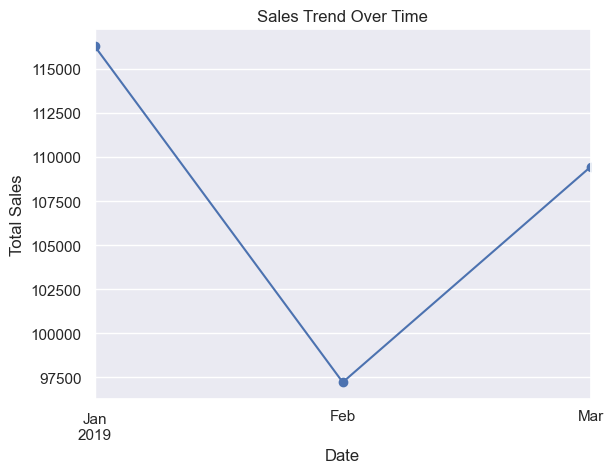

In [26]:
# Create line chart of sales trend
sm['Date'] = pd.to_datetime(sm['Date'])
monthly_sales = sm.resample('M', on='Date')['Total'].sum()
plt.figure
monthly_sales.plot(marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Showing the plot
plt.show()

# Scatter plot - Relationship between quantity sold and unit price

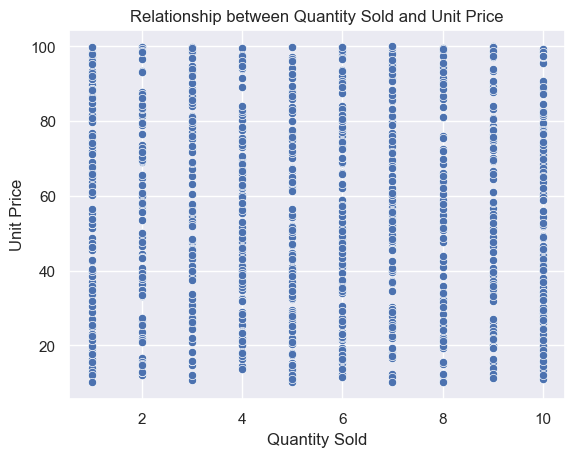

In [27]:
# Creating scatter plot to check relationship between quantity sold unit price
plt.figure
sns.scatterplot(x='Quantity', y='Unit price', data=sm)
plt.title('Relationship between Quantity Sold and Unit Price')
plt.xlabel('Quantity Sold')
plt.ylabel('Unit Price')

# Showing plot
plt.show()

# Comparison of sales and taxes by branch

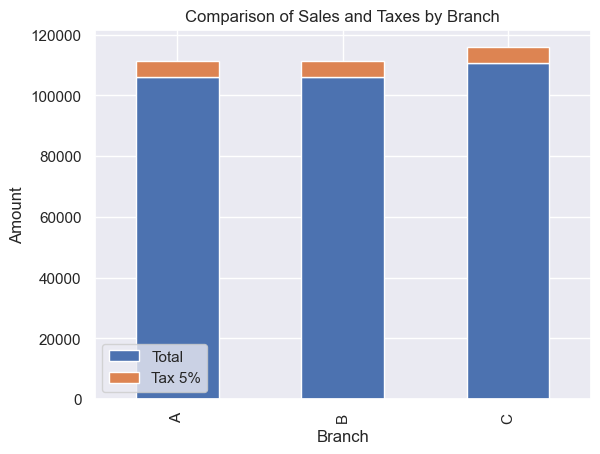

In [28]:
# Creating bar plot to compare sales and tax
salestax_bybranch = sm.groupby('Branch')[['Total', 'Tax 5%']].sum()
salestax_bybranch.plot(kind='bar', stacked=True)
plt.title('Comparison of Sales and Taxes by Branch')
plt.xlabel('Branch')
plt.ylabel('Amount')

# Showing plot
plt.show()

# Distribution of sales ratings

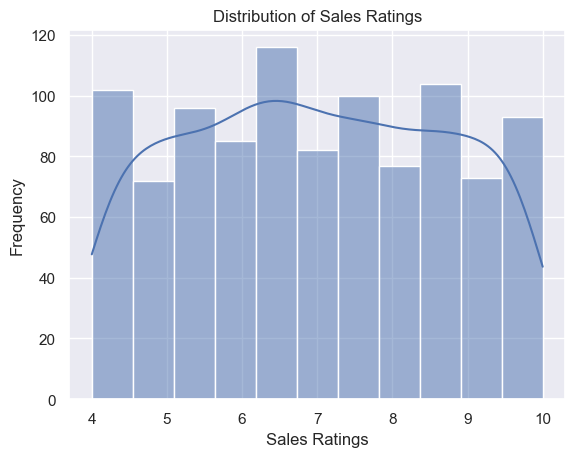

In [29]:
# Creating histogram by using histplot to see distributio of sales rating
sns.histplot(sm.Rating, kde=True)
plt.xlabel('Sales Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Ratings')

# SHowing plot
plt.show()

# Distribution of sales ratings by branch - using Matplotlib

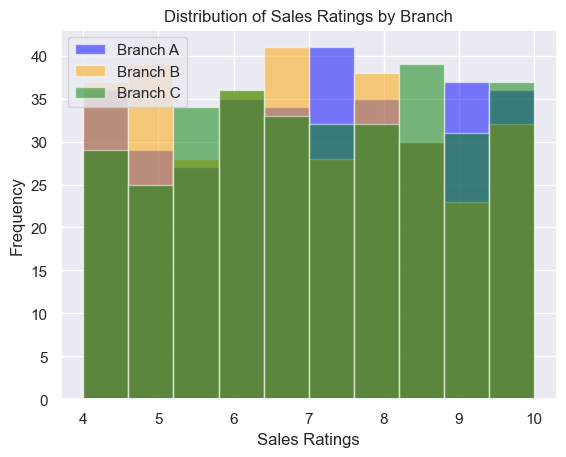

In [30]:
# Grouping data by branch
branches = sm.groupby('Branch')['Rating']

# Creating separate histograms for each branch
plt.figure
colors = ['blue', 'orange', 'green'] 
for i, (branch, ratings) in enumerate(branches):
    plt.hist(ratings, bins=10, alpha=0.5, label=f'Branch {branch}', color=colors[i])

plt.xlabel('Sales Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Ratings by Branch')
plt.legend()

# Showing plot
plt.show()

# Heatmap: Sales performance by date and time

In [31]:
# Extracting Year, Month and Day from dataset and creating new columns to perform time series analysis
# Here first i converted the column Date is in object formate. I converted it into Date Time formate

sm.info()
sm["Date"] = pd.to_datetime(sm["Date"])
sm.Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [32]:
# Year
# Defining date
sm["Date"].dt.year

# Month
# Defining month
sm["Date"].dt.month

# Day
# Defining day
sm["Date"].dt.day

0       5
1       8
2       3
3      27
4       8
       ..
995    29
996     2
997     9
998    22
999    18
Name: Date, Length: 1000, dtype: int64

In [33]:
# Creating Year, Month and Day Columns in the dataset

# Assuming 'sm' is your DataFrame
# Adding year column
sm["Year"] = sm["Date"].dt.year
# Assuming 'sm' is your DataFrame
# Adding Month column 
sm["Month"] = sm["Date"].dt.month
# Assuming 'sm' is your DataFrame
# Adding Day column 
sm["Day"] = sm["Date"].dt.day

#Printing the dataset to check the new columns
sm

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2,2019,1,29
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2019,3,2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,2019,2,9
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1,2019,2,22


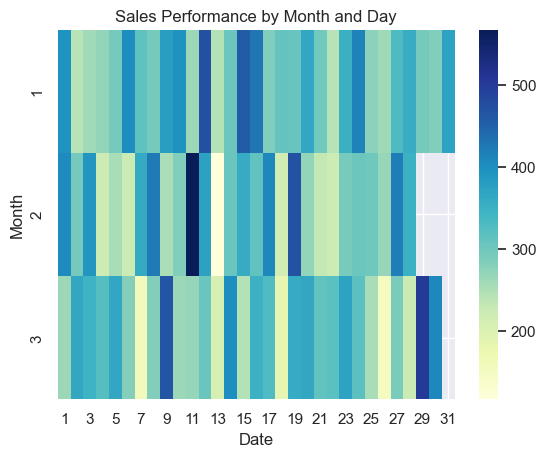

In [34]:
# Creating pivot table for heatmap
s_pvt = sm.pivot_table(index='Month', columns='Day', values='Total')

# Creating heatmap
plt.figure
sns.heatmap(s_pvt, cmap='YlGnBu',fmt='g')
plt.title('Sales Performance by Month and Day')
plt.xlabel('Date')
plt.ylabel('Month')

# Showing plot
plt.show()

# Box Plot: Distribution Gross income across product lines

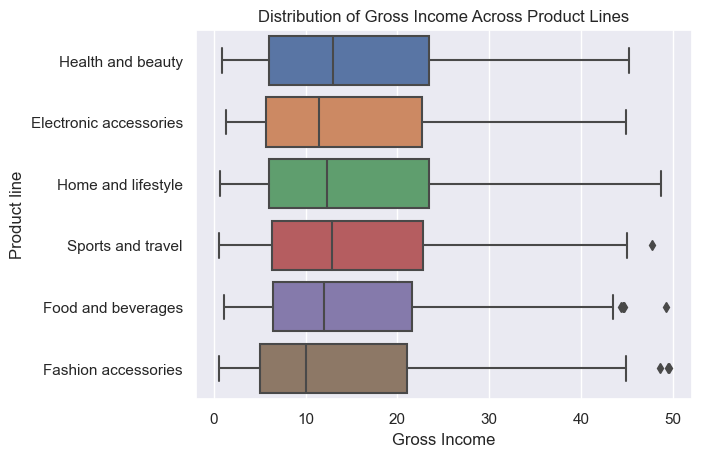

In [35]:
# Creating boxplot of gross income distribution
plt.figure
sns.boxplot(x='gross income', y='Product line', data=sm)
plt.xlabel('Gross Income')
plt.ylabel('Product line')
plt.title('Distribution of Gross Income Across Product Lines')

# Showing plot
plt.show()

# Stacked Area Chart: Revenue contribution by branch over time

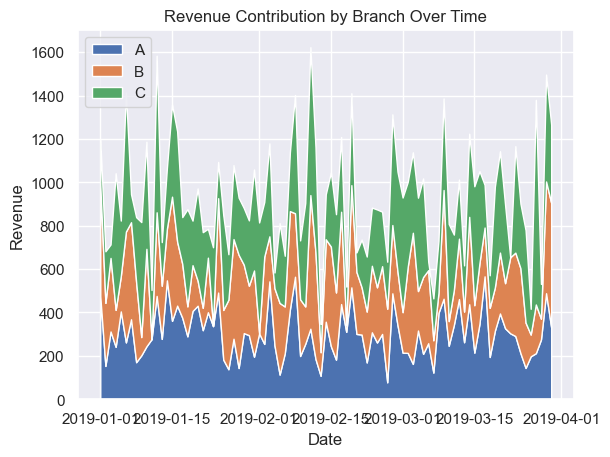

In [36]:
# Creating pivot table for bar chart
pivot_data = sm.pivot_table(index='Date', columns='Branch', values='Total', fill_value=0)

plt.figure
plt.stackplot(pivot_data.index, pivot_data.values.T, labels=pivot_data.columns)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Revenue Contribution by Branch Over Time')
plt.legend(loc='upper left')

# Showing plot
plt.show()

# Donut Chart: Payment method distribution

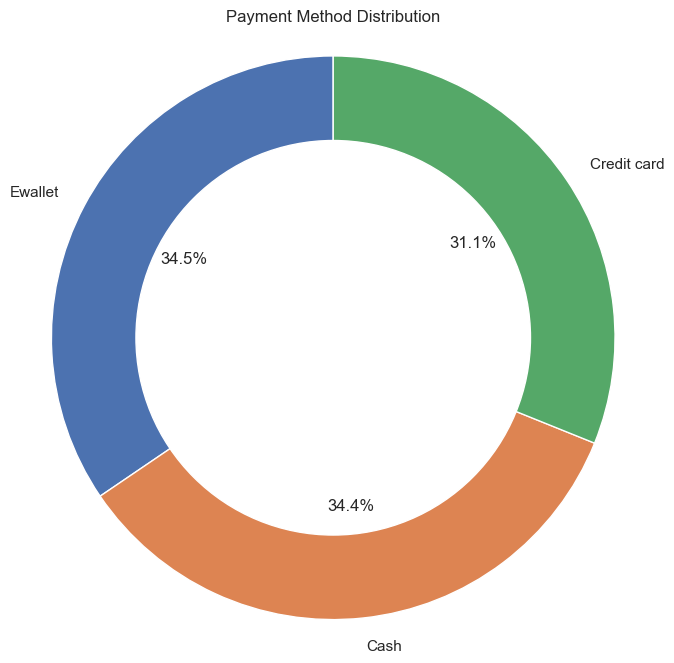

In [37]:
# Calculating payment method frequencies
payment_counts = sm['Payment'].value_counts()

# Extracing labels (payment methods) and counts for the chart
payment_methods = payment_counts.index.tolist()
counts = payment_counts.values.tolist()

# Creating a donut chart using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=payment_methods, autopct='%1.1f%%', startangle=90)

# Drawing a circle to create a donut chart
circle = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(circle)
plt.title('Payment Method Distribution')
plt.axis('equal')
plt.show()


# Daywise Sales Trend 

<Axes: >

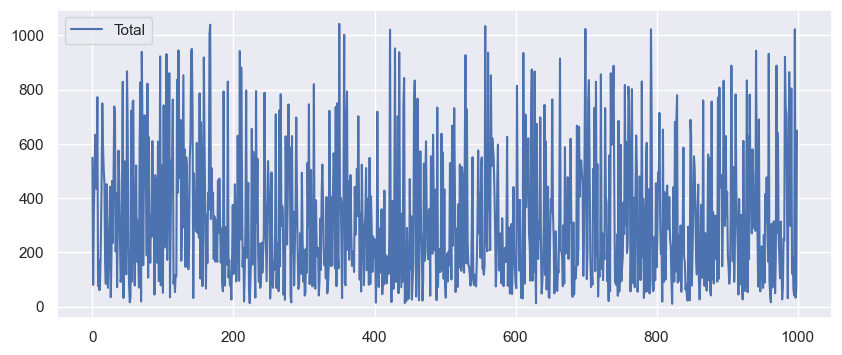

In [38]:
# Creating and showing plot of sales trend
sm['Total'].plot(legend=True,figsize=(10,4))

# Heatmap

<Axes: >

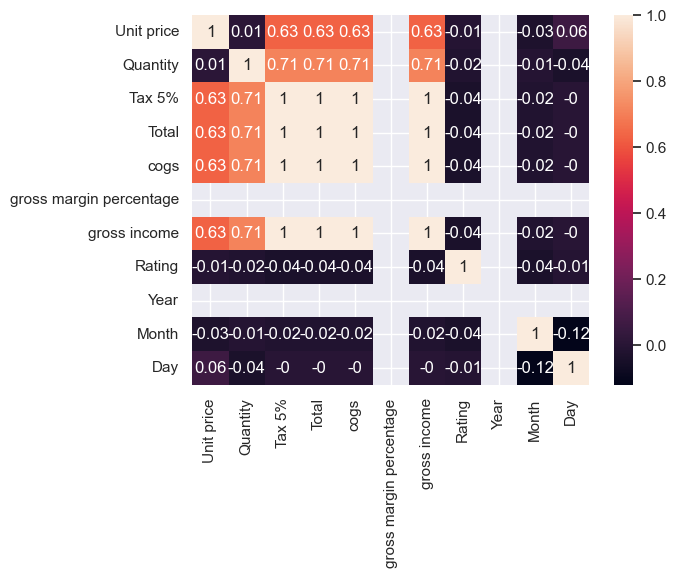

In [39]:
# Creating and showing heatmap
sns.heatmap(np.round(sm.corr(), 2), annot= True)

# Which product line has purchased the highest quanity ?

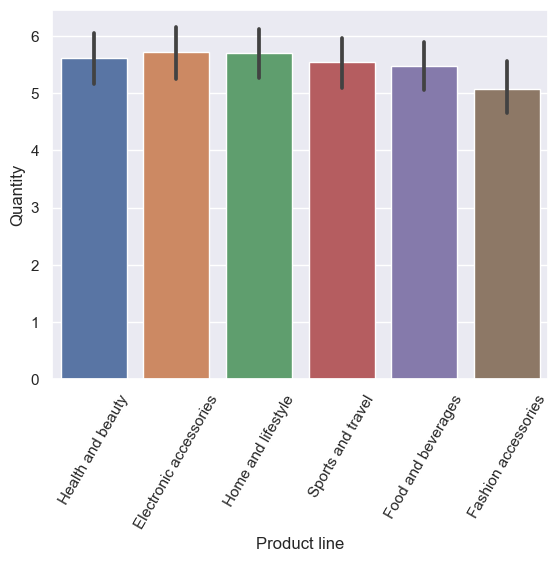

In [40]:
# Creating barplot of productlines quantity wise
plt.figure
sns.barplot(x='Product line', y='Quantity', data=sm)
plt.xlabel('Product line')
plt.ylabel('Quantity')
plt.xticks(rotation = 60)

# Showing plot
plt.show()

# Relationship between rating and sales using scatterplot(plotly lib)

In [42]:
import plotly.express as px
fig = px.scatter(sm, x='Total',y='Rating',color = "Total",hover_name = 'Branch')
fig.show()

# Pairwise relationships between variables within a dataset -Pairplot

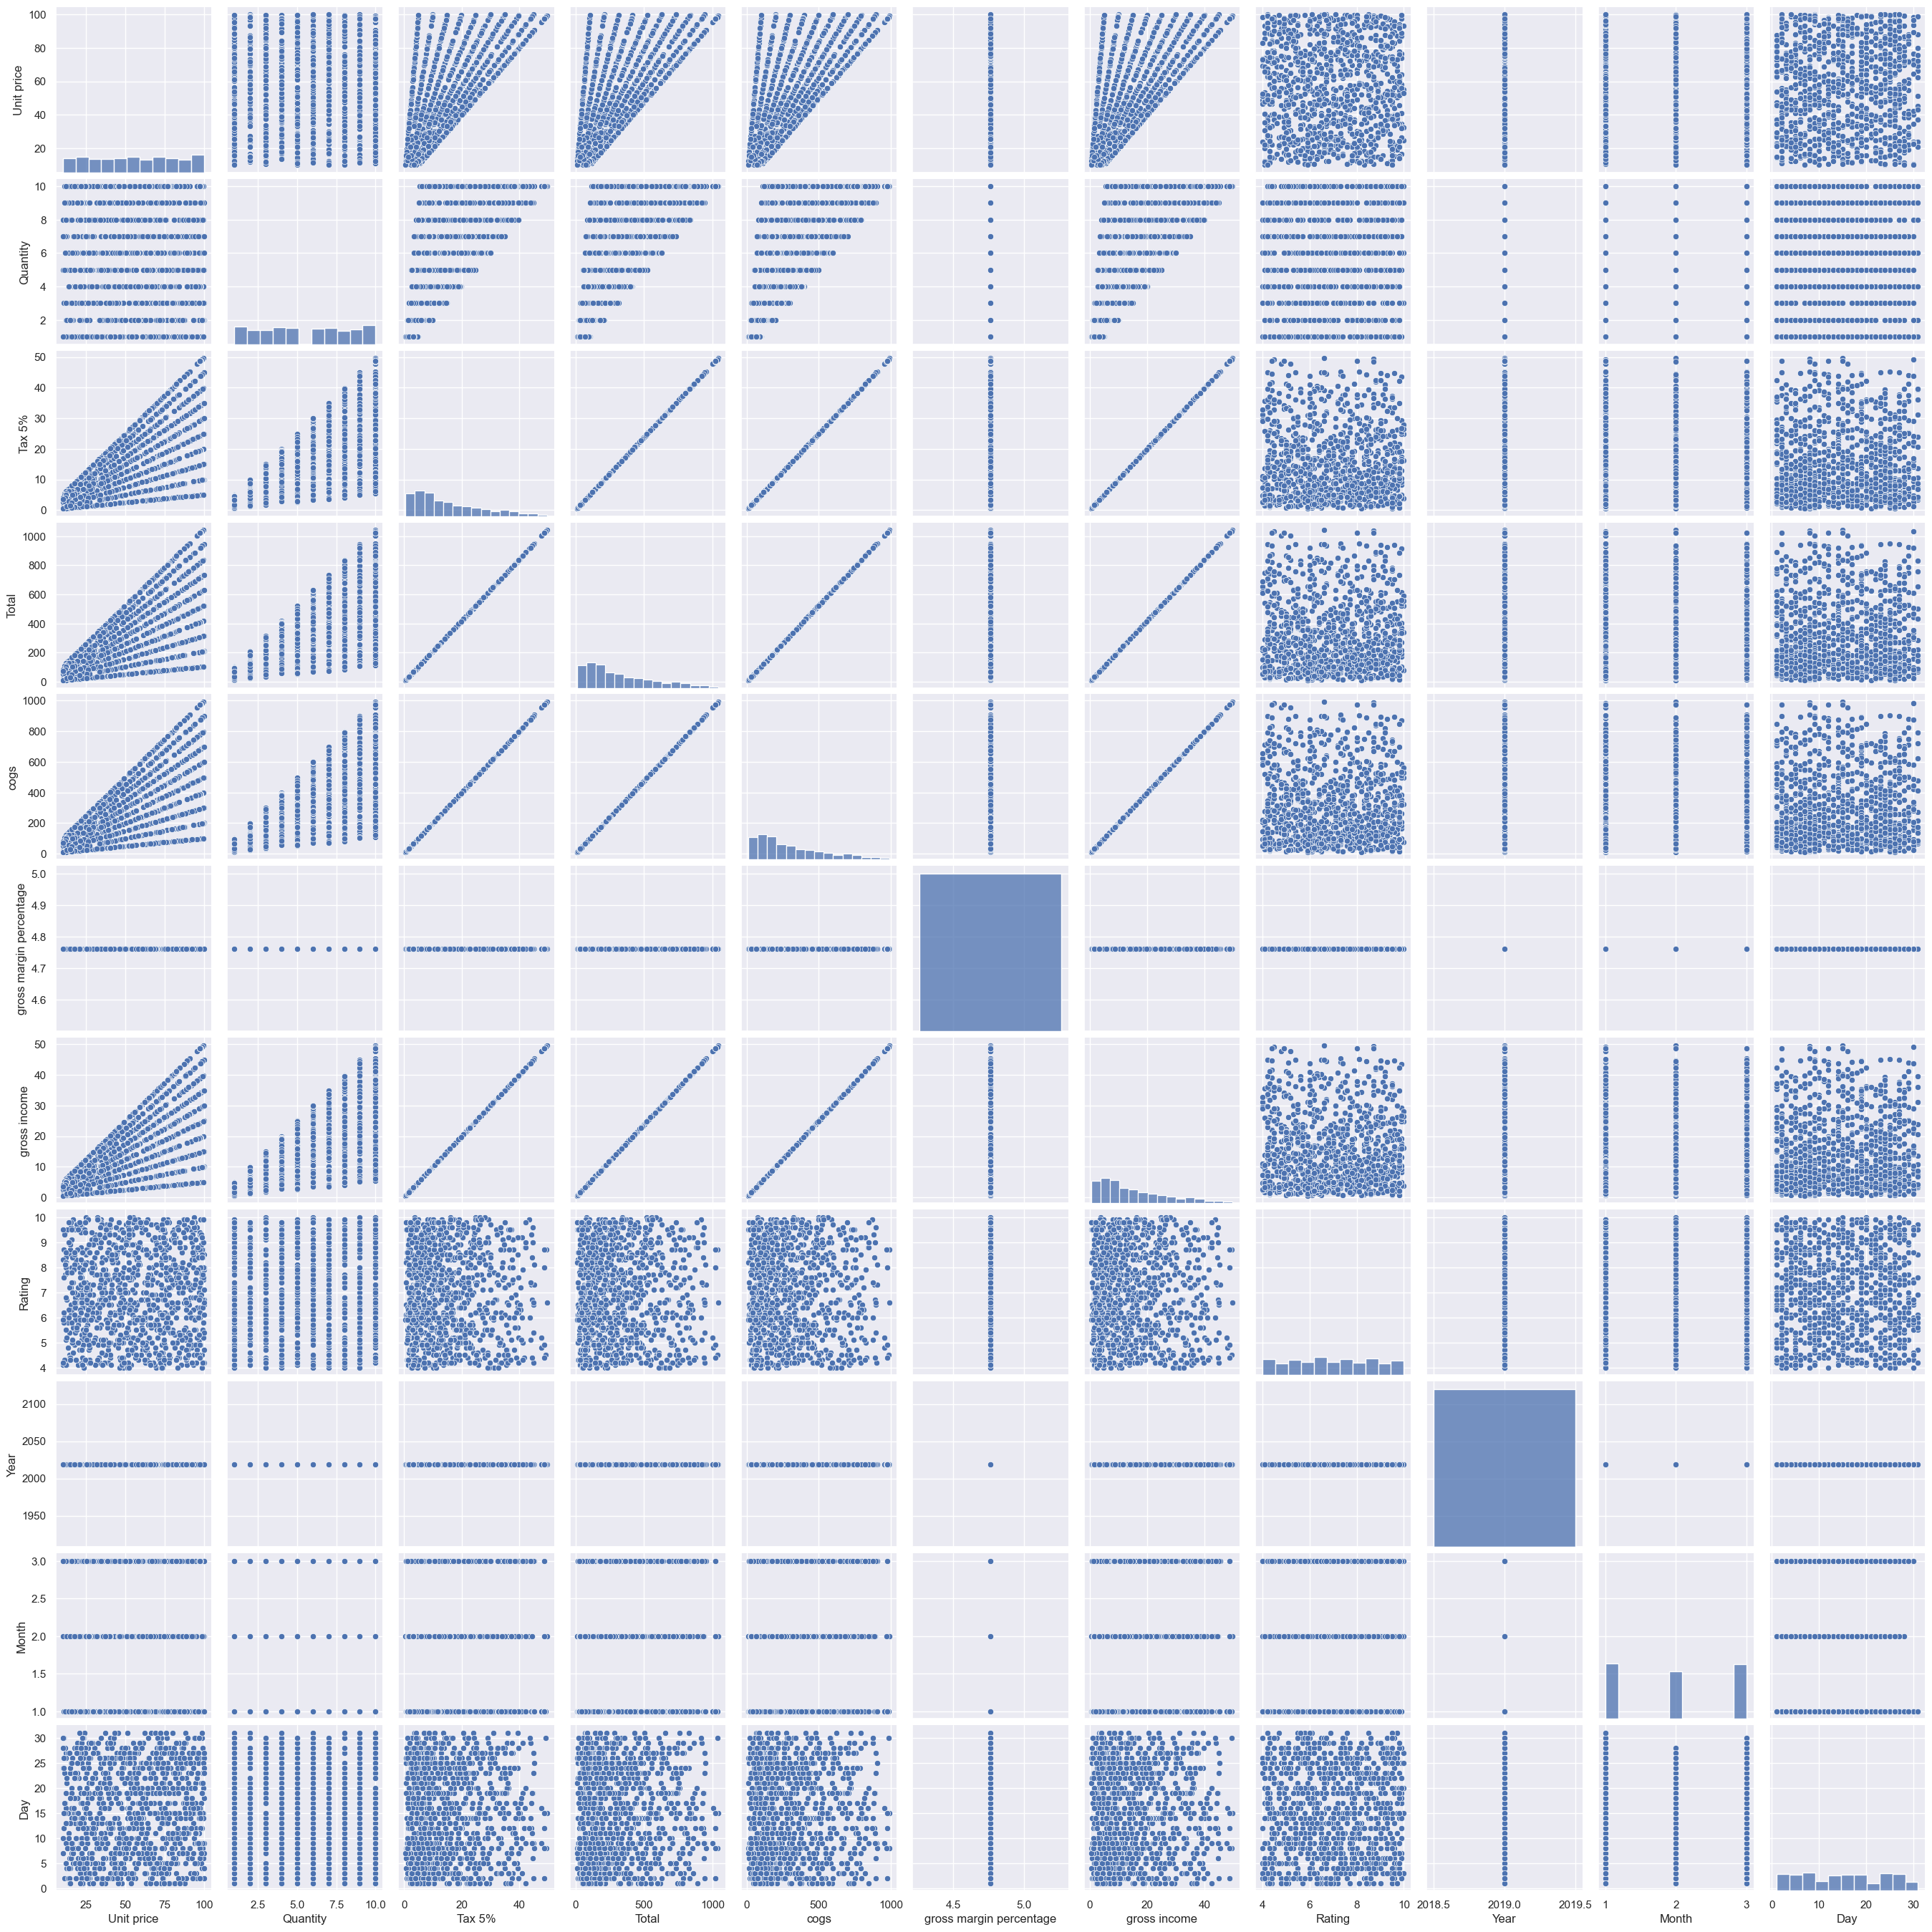

In [47]:
# Creating pairplot
sns.pairplot(sm)

# Spending pattern of females and males as per product category

<Axes: title={'center': 'Total Monthly transaction by Gender'}, xlabel='Product line', ylabel='count'>

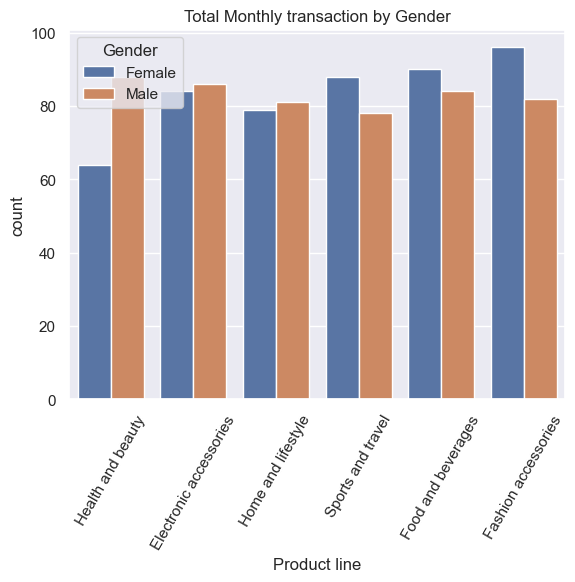

In [48]:
# Creating countplot of monthly transactions grouping by product line
plt.figure
plt.title('Total Monthly transaction by Gender')
plt.xticks(rotation = 60)
sns.countplot(x=sm['Product line'], hue = sm.Gender)

# Histogram of Attributes

array([[<Axes: title={'center': 'Unit price'}>,
        <Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Tax 5%'}>],
       [<Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'cogs'}>],
       [<Axes: title={'center': 'gross margin percentage'}>,
        <Axes: title={'center': 'gross income'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>]], dtype=object)

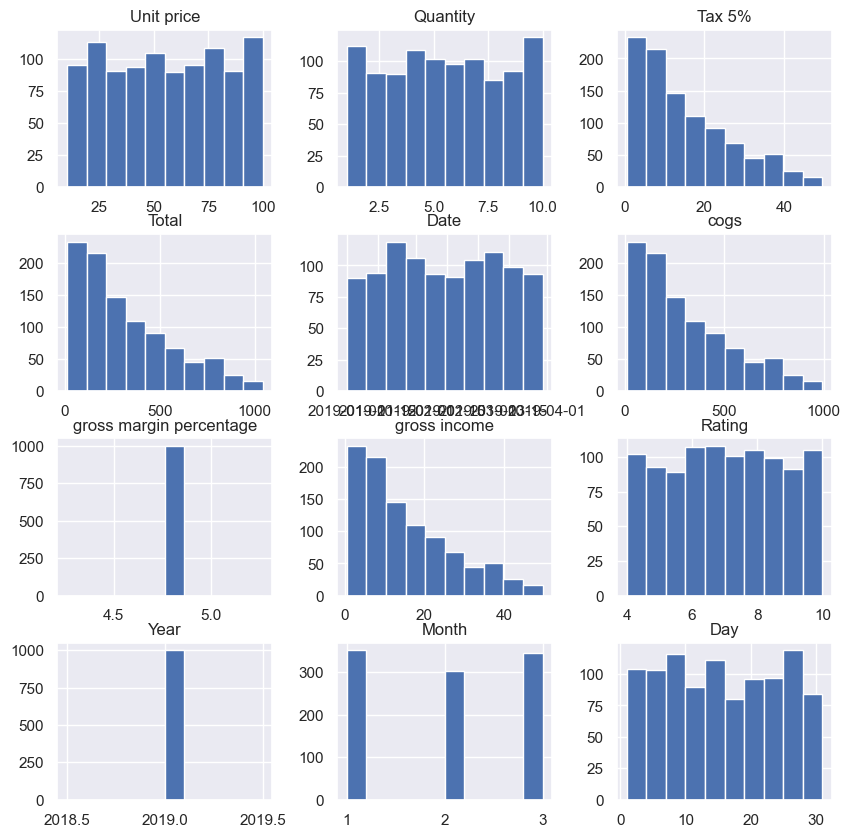

In [49]:
# Creating Histogram
sm.hist(figsize=(10,10))

# Genderwise sales per branch - Stripplot

<Axes: xlabel='Total', ylabel='Branch'>

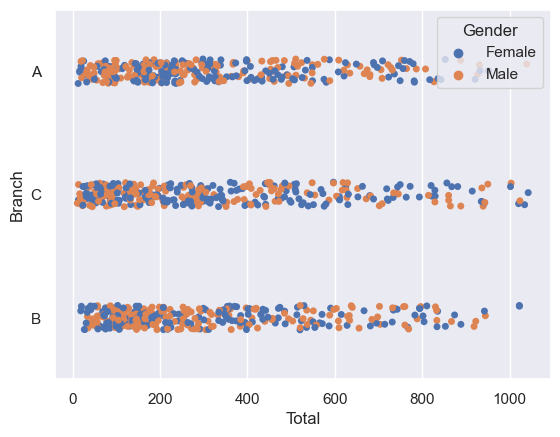

In [50]:
# Creating strip plot of sales genderwise
sns.stripplot(y = 'Branch', x = 'Total',data = sm, hue = 'Gender')

# Branchwise rating as per Customer Type - Swarmplot

Text(0.5, 1.0, 'Customer Type')

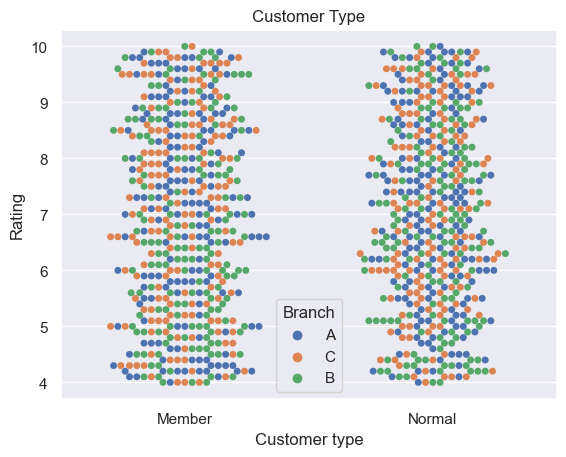

In [51]:
# Creating swarmplot of customer segment
sns.swarmplot(x = 'Customer type', y = 'Rating', hue = 'Branch', data = sm).set_title('Customer Type')

# Cogs as per Product Line - Boxenplot

<Axes: xlabel='cogs', ylabel='Product line'>

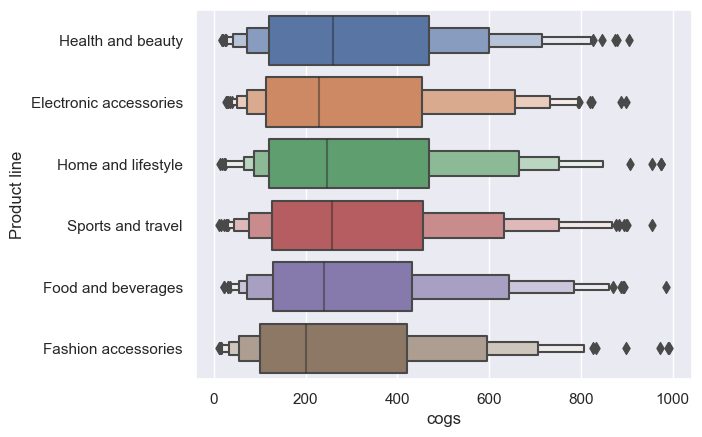

In [52]:
# Creating boxplot of productlines
sns.boxenplot(y = 'Product line', x = 'cogs',data = sm)

# Distribution of Sales Across Branches - Voilinplot

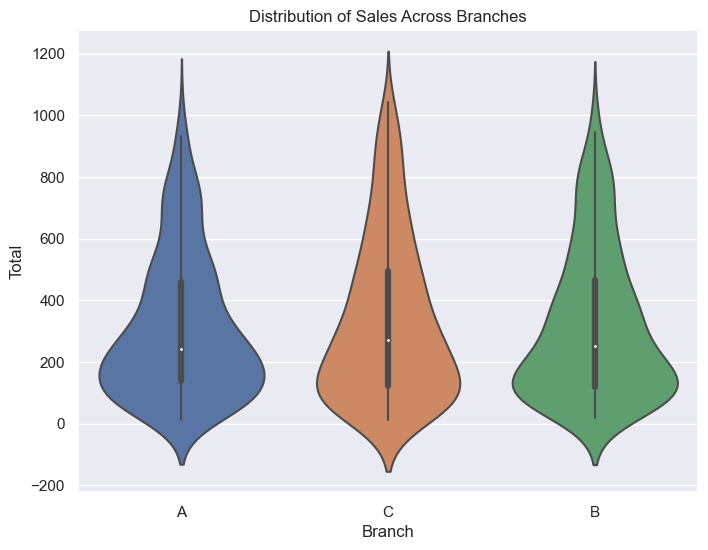

In [53]:
# Creating the violin plot of sales grouping by branches
plt.figure(figsize=(8, 6))
sns.violinplot(x='Branch', y='Total', data=sm)
plt.title('Distribution of Sales Across Branches')
plt.xlabel('Branch')
plt.ylabel('Total')

# Showing plot
plt.show()

# Male vs Female income

<Figure size 1200x700 with 0 Axes>

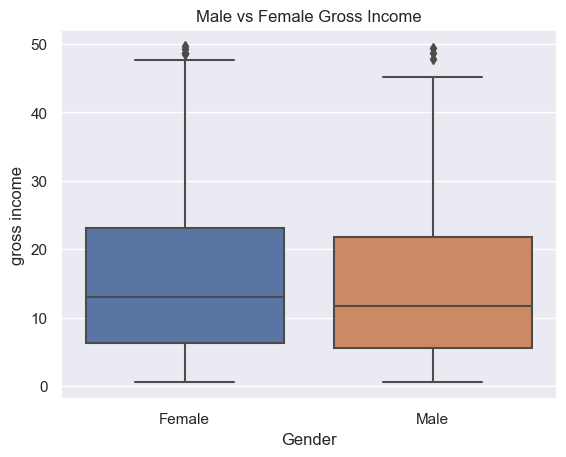

<Figure size 1200x700 with 0 Axes>

In [54]:
# Creating boxplot of grossincome grouping by gender
sns.boxplot(x=sm['Gender'],y=sm['gross income'])
plt.title('Male vs Female Gross Income')
plt.figure(figsize=(12, 7))

# Customertype per Branch

Text(0.5, 1.0, 'Customer Type By Branch')

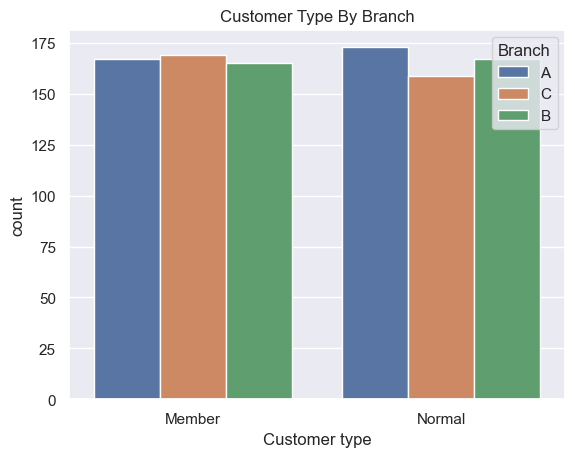

In [55]:
# Creating countplot of customer segment grouping bt branches 
sns.countplot(x = 'Customer type', data = sm, hue = 'Branch').set_title('Customer Type By Branch')

# Total sales month-wise

In [56]:
# Assuming 'sm' is your DataFrame
# Group by 'Month' and 'Total' to get the total sales


monthlysales = sm.groupby('Month')['Total'].sum().reset_index()

# Printing the result
monthlysales

,Month,Total
0,1,116291.868
1,2,97219.374
2,3,109455.507


# Highest selling product line

In [57]:
# Assuming 'sm' is your DataFrame
# Group by 'Product Line' and 'Quantity' to get the highest selling product line
quantcount = sm.groupby('Product line')['Quantity'].sum().reset_index()

#Printing the result
quantcount.max()

Product line    Sports and travel
Quantity                      971
dtype: object

# Which payment method is using by most of the people

In [58]:
# Assuming 'sm' is your DataFrame
# Group by 'Payment' and 'total' to get the most used payment method
most_pmethod = sm.groupby('Payment')['Total'].sum().reset_index()

# Printing the result
most_pmethod.max()

Payment      Ewallet
Total      112206.57
dtype: object

# Most valuble customer segment as per gross income

In [59]:
# Assuming 'sm' is your DataFrame
# Group by 'Customer type' and 'gross income' to get the most valuble customer segment
most_vsegment = sm.groupby('Customer type')['gross income'].sum().reset_index()

# Printing the result
most_vsegment

,Customer type,gross income
0,Member,7820.164
1,Normal,7559.205


# Who purchases more ? Men or Women ?

In [60]:
# Assuming 'sm' is your DataFrame
# Group by 'Gender' and 'Total' find out which gender has more purchases
g_sell = sm.groupby('Gender')['Total'].sum().reset_index()

# Printing the result
g_sell.max()

Gender          Male
Total     167882.925
dtype: object

# Interests of Men & Women - Product Wise

In [61]:
# Assuming 'sm' is your DataFrame
# Finding the total count value of males in each product line to get total product count gender wise

sm[['Product line','Gender']][(sm['Gender']=='Male')].value_counts().reset_index()

#Printing the result
print(sm[['Product line','Gender']][(sm['Gender']=='Male')].value_counts().reset_index())

             Product line Gender   0
0       Health and beauty   Male  88
1  Electronic accessories   Male  86
2      Food and beverages   Male  84
3     Fashion accessories   Male  82
4      Home and lifestyle   Male  81
5       Sports and travel   Male  78


In [62]:
# Assuming 'sm' is your DataFrame
# Finding the total count value of females in each product line to get total product count gender wise

sm[['Product line','Gender']][(sm['Gender']=='Female')].value_counts().reset_index()

#Printing the result
print(sm[['Product line','Gender']][(sm['Gender']=='Female')].value_counts().reset_index())

             Product line  Gender   0
0     Fashion accessories  Female  96
1      Food and beverages  Female  90
2       Sports and travel  Female  88
3  Electronic accessories  Female  84
4      Home and lifestyle  Female  79
5       Health and beauty  Female  64


# Most expensive product among all

In [63]:
# Assuming 'sm' is your DataFrame
# Finding the expensive product in total products

expensiveproduct = sm.loc[sm["Total"].idxmax()]

# Printing the result
print(expensiveproduct)

Invoice ID                         860-79-0874
Branch                                       C
City                                 Naypyitaw
Customer type                           Member
Gender                                  Female
Product line               Fashion accessories
Unit price                                99.3
Quantity                                    10
Tax 5%                                   49.65
Total                                  1042.65
Date                       2019-02-15 00:00:00
Time                                     14:53
Payment                            Credit card
cogs                                     993.0
gross margin percentage               4.761905
gross income                             49.65
Rating                                     6.6
Year                                      2019
Month                                        2
Day                                         15
Name: 350, dtype: object


# Relationship between rating and sales

In [64]:
# Performing Correlation analysis to get the relationship between two columns rating and total 
sm[['Rating','Total']].corr()

#This says the rating and quantity is inversly propotional to each other. When rating increases the total sales decreased and vice versa

,Rating,Total
Rating,1.000000,-0.036442
Total,-0.036442,1.000000


# Best vs Worst performing branches

In [65]:
# Assuming 'sm' is your DataFrame
# # Group by 'Branch' and 'Total' to get the best performing branch
best_branch = sm.groupby('Branch')['Total'].max().reset_index()

#printing the result
best_branch.max()

Branch          C
Total     1042.65
dtype: object

In [79]:
#Worst performing branch# What is the most popular product line in each city?

city_product_counts = sm.groupby(['City', 'Product line'])['Invoice ID'].count().unstack()
most_popular_products = city_product_counts.idxmax(axis=1)
print(most_popular_products)


City
Mandalay     Fashion accessories
Naypyitaw     Food and beverages
Yangon        Home and lifestyle
dtype: object


In [80]:
# Calculate the average rating by customer type and gender

avg_rating = sm.groupby(['Customer type', 'Gender'])['Rating'].mean()
print(avg_rating)

Customer type  Gender
Member         Female    6.940613
               Male      6.940000
Normal         Female    6.990417
               Male      7.018919
Name: Rating, dtype: float64


In [81]:
# Calculate the most common payment method

common_payment_method = sm['Payment'].mode().values[0]
print(common_payment_method)

Ewallet


In [82]:
# Calculate the average gross income by product line

avg_gross_income_by_product = sm.groupby('Product line')['gross income'].mean()
print(avg_gross_income_by_product)

Product line
Electronic accessories    15.220597
Fashion accessories       14.528062
Food and beverages        15.365310
Health and beauty         15.411572
Home and lifestyle        16.030331
Sports and travel         15.812630
Name: gross income, dtype: float64


In [83]:
# Calculate the distribution of customer types in each city

city_customer_distribution = sm.groupby(['City', 'Customer type'])['Invoice ID'].count().unstack()
print(city_customer_distribution)

Customer type  Member  Normal
City                         
Mandalay          165     167
Naypyitaw         169     159
Yangon            167     173


In [84]:
# Median Total Purchase Price and percentage above 

#calculating the median total purchase price by product
avg_total_by_product = sm.groupby('Product line')['Total'].mean()
print(avg_total_by_product)

Product line
Electronic accessories    319.632538
Fashion accessories       305.089298
Food and beverages        322.671517
Health and beauty         323.643020
Home and lifestyle        336.636956
Sports and travel         332.065220
Name: Total, dtype: float64


In [86]:
# Find purchases above median for each product line
purchases_above_median = sm['Total'] > sm['Product line'].map(avg_total_by_product)

# Calculate the percentage of purchases above the median for each product line
percentage_above_median = purchases_above_median.groupby(sm['Product line']).mean() * 100

# Print the result
print("Percentage of purchases above median total by product line:")
print(percentage_above_median)

Percentage of purchases above median total by product line:
Product line
Electronic accessories    39.411765
Fashion accessories       42.134831
Food and beverages        38.505747
Health and beauty         39.473684
Home and lifestyle        39.375000
Sports and travel         44.578313
dtype: float64


In [87]:

# What product coincides with the highest total price

# Find the product line with the highest total price
max_total_product_line = sm.loc[sm['Total'].idxmax(), 'Product line']

# Filter the DataFrame for purchases with the highest total price
max_total_purchases = sm[sm['Product line'] == max_total_product_line]

# Print the result
print(max_total_product_line)
print(max_total_purchases)


Fashion accessories
      Invoice ID Branch       City Customer type  Gender         Product line  \
10   351-62-0822      B   Mandalay        Member  Female  Fashion accessories   
26   649-29-6775      B   Mandalay        Normal    Male  Fashion accessories   
27   189-17-4241      A     Yangon        Normal  Female  Fashion accessories   
30   871-79-8483      B   Mandalay        Normal    Male  Fashion accessories   
49   574-22-5561      C  Naypyitaw        Member  Female  Fashion accessories   
..           ...    ...        ...           ...     ...                  ...   
974  744-82-9138      C  Naypyitaw        Normal    Male  Fashion accessories   
975  883-69-1285      B   Mandalay        Member    Male  Fashion accessories   
985  374-38-5555      B   Mandalay        Normal  Female  Fashion accessories   
993  690-01-6631      B   Mandalay        Normal    Male  Fashion accessories   
999  849-09-3807      A     Yangon        Member  Female  Fashion accessories   

     Un

In [88]:
# Percentage of gender for each product line

# Assuming 'sm' is your DataFrame
# Group by 'Product line' and 'Gender' to get the count of each combination
gender_product_counts = sm.groupby(['Product line', 'Gender']).size().unstack(fill_value=0)

# Calculate the percentage for each gender related to each product line
percentage_by_gender = gender_product_counts.div(gender_product_counts.sum(axis=1), axis=0) * 100

# Print the result
print(percentage_by_gender)

Gender                     Female       Male
Product line                                
Electronic accessories  49.411765  50.588235
Fashion accessories     53.932584  46.067416
Food and beverages      51.724138  48.275862
Health and beauty       42.105263  57.894737
Home and lifestyle      49.375000  50.625000
Sports and travel       53.012048  46.987952


In [89]:
# Gender percentages for each city and each branch

# Assuming 'sm' is your DataFrame
# Group by 'City', 'Branch', and 'Gender' to get the count of each combination
gender_city_branch_counts = sm.groupby(['City', 'Branch', 'Gender']).size().unstack(fill_value=0)

# Calculate the percentage for each gender for each city and each branch
percentage_by_gender_city_branch = gender_city_branch_counts.div(gender_city_branch_counts.sum(axis=1), axis=0) * 100

# Print the result
print(percentage_by_gender_city_branch)

Gender               Female       Male
City      Branch                      
Mandalay  B       48.795181  51.204819
Naypyitaw C       54.268293  45.731707
Yangon    A       47.352941  52.647059


In [90]:
# Average quantity of products associated with each product line

worst_branch = sm.groupby('Branch')['Total'].min().reset_index()
worst_branch.min()

Branch          A
Total     10.6785
dtype: object

# Calculate total sales for each branch


In [67]:
# Calculate total sales for each branch
branch_sales = sm.groupby('Branch')['Total'].sum()
print(branch_sales)

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


# What is the most popular product line in each city?

In [68]:
city_product_counts = sm.groupby(['City', 'Product line'])['Invoice ID'].count().unstack()
most_popular_products = city_product_counts.idxmax(axis=1)
print(most_popular_products)

City
Mandalay     Fashion accessories
Naypyitaw     Food and beverages
Yangon        Home and lifestyle
dtype: object


# Calculate the average rating by customer type and gender

In [69]:
avg_rating = sm.groupby(['Customer type', 'Gender'])['Rating'].mean()
print(avg_rating)

Customer type  Gender
Member         Female    6.940613
               Male      6.940000
Normal         Female    6.990417
               Male      7.018919
Name: Rating, dtype: float64


# Calculate the most common payment method

In [70]:
common_payment_method = sm['Payment'].mode().values[0]
print(common_payment_method)

Ewallet


# Calculate the average gross income by product line

In [71]:
avg_gross_income_by_product = sm.groupby('Product line')['gross income'].mean()
print(avg_gross_income_by_product)

Product line
Electronic accessories    15.220597
Fashion accessories       14.528062
Food and beverages        15.365310
Health and beauty         15.411572
Home and lifestyle        16.030331
Sports and travel         15.812630
Name: gross income, dtype: float64


# Calculate the distribution of customer types in each city

In [72]:
city_customer_distribution = sm.groupby(['City', 'Customer type'])['Invoice ID'].count().unstack()
print(city_customer_distribution)

Customer type  Member  Normal
City                         
Mandalay          165     167
Naypyitaw         169     159
Yangon            167     173


# Median Total Purchase Price and percentage above 

In [73]:
#calculating the median total purchase price by product
avg_total_by_product = sm.groupby('Product line')['Total'].mean()
print(avg_total_by_product)

Product line
Electronic accessories    319.632538
Fashion accessories       305.089298
Food and beverages        322.671517
Health and beauty         323.643020
Home and lifestyle        336.636956
Sports and travel         332.065220
Name: Total, dtype: float64


In [74]:
# Find purchases above median for each product line
purchases_above_median = sm['Total'] > sm['Product line'].map(avg_total_by_product)

# Calculate the percentage of purchases above the median for each product line
percentage_above_median = purchases_above_median.groupby(sm['Product line']).mean() * 100

# Print the result
print("Percentage of purchases above median total by product line:")
print(percentage_above_median)


Percentage of purchases above median total by product line:
Product line
Electronic accessories    39.411765
Fashion accessories       42.134831
Food and beverages        38.505747
Health and beauty         39.473684
Home and lifestyle        39.375000
Sports and travel         44.578313
dtype: float64


# What product coincides with the highest total price

In [75]:
# Find the product line with the highest total price
max_total_product_line = sm.loc[sm['Total'].idxmax(), 'Product line']

# Filter the DataFrame for purchases with the highest total price
max_total_purchases = sm[sm['Product line'] == max_total_product_line]

# Print the result
print(max_total_product_line)
print(max_total_purchases)


Fashion accessories
      Invoice ID Branch       City Customer type  Gender         Product line  \
10   351-62-0822      B   Mandalay        Member  Female  Fashion accessories   
26   649-29-6775      B   Mandalay        Normal    Male  Fashion accessories   
27   189-17-4241      A     Yangon        Normal  Female  Fashion accessories   
30   871-79-8483      B   Mandalay        Normal    Male  Fashion accessories   
49   574-22-5561      C  Naypyitaw        Member  Female  Fashion accessories   
..           ...    ...        ...           ...     ...                  ...   
974  744-82-9138      C  Naypyitaw        Normal    Male  Fashion accessories   
975  883-69-1285      B   Mandalay        Member    Male  Fashion accessories   
985  374-38-5555      B   Mandalay        Normal  Female  Fashion accessories   
993  690-01-6631      B   Mandalay        Normal    Male  Fashion accessories   
999  849-09-3807      A     Yangon        Member  Female  Fashion accessories   

     Un

# Percentage of gender for each product line

In [76]:
# Assuming 'sm' is your DataFrame
# Group by 'Product line' and 'Gender' to get the count of each combination
gender_product_counts = sm.groupby(['Product line', 'Gender']).size().unstack(fill_value=0)

# Calculate the percentage for each gender related to each product line
percentage_by_gender = gender_product_counts.div(gender_product_counts.sum(axis=1), axis=0) * 100

# Print the result
print(percentage_by_gender)

Gender                     Female       Male
Product line                                
Electronic accessories  49.411765  50.588235
Fashion accessories     53.932584  46.067416
Food and beverages      51.724138  48.275862
Health and beauty       42.105263  57.894737
Home and lifestyle      49.375000  50.625000
Sports and travel       53.012048  46.987952


# Gender percentages for each city and each branch

In [77]:
# Assuming 'sm' is your DataFrame
# Group by 'City', 'Branch', and 'Gender' to get the count of each combination
gender_city_branch_counts = sm.groupby(['City', 'Branch', 'Gender']).size().unstack(fill_value=0)

# Calculate the percentage for each gender for each city and each branch
percentage_by_gender_city_branch = gender_city_branch_counts.div(gender_city_branch_counts.sum(axis=1), axis=0) * 100

# Print the result
print(percentage_by_gender_city_branch)

Gender               Female       Male
City      Branch                      
Mandalay  B       48.795181  51.204819
Naypyitaw C       54.268293  45.731707
Yangon    A       47.352941  52.647059


# Average quantity of products associated with each product line

In [78]:
# Assuming 'sm' is your DataFrame
# Group by 'Product line' and 'Product' to get the average quantity for each combination
average_quantity_by_product_line_product = sm.groupby('Product line')['Quantity'].mean()

# Print the result
print(average_quantity_by_product_line_product)

Product line
Electronic accessories    5.711765
Fashion accessories       5.067416
Food and beverages        5.471264
Health and beauty         5.618421
Home and lifestyle        5.693750
Sports and travel         5.542169
Name: Quantity, dtype: float64
